# Guide to arcgis.geometry module (Part 2)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Spatial-Operations" data-toc-modified-id="Spatial-Operations-1">Spatial Operations</a></span><ul class="toc-item"><li><span><a href="#a.-OOP-Pattern" data-toc-modified-id="a.-OOP-Pattern-1.1">a. OOP Pattern</a></span><ul class="toc-item"><li><span><a href="#a1.-Union" data-toc-modified-id="a1.-Union-1.1.1">a1. Union</a></span></li><li><span><a href="#a2.-Difference" data-toc-modified-id="a2.-Difference-1.1.2">a2. Difference</a></span></li><li><span><a href="#a3.-Symmetric-difference" data-toc-modified-id="a3.-Symmetric-difference-1.1.3">a3. Symmetric difference</a></span></li><li><span><a href="#a4.-intersect()-and-overlaps()" data-toc-modified-id="a4.-intersect()-and-overlaps()-1.1.4">a4. intersect() and overlaps()</a></span></li><li><span><a href="#a5.-Equals" data-toc-modified-id="a5.-Equals-1.1.5">a5. Equals</a></span></li><li><span><a href="#a6.-generalize-V.S.-buffer" data-toc-modified-id="a6.-generalize-V.S.-buffer-1.1.6">a6. generalize V.S. buffer</a></span></li><li><span><a href="#a7.-distance" data-toc-modified-id="a7.-distance-1.1.7">a7. distance</a></span></li><li><span><a href="#a8.-contains" data-toc-modified-id="a8.-contains-1.1.8">a8. contains</a></span></li><li><span><a href="#a9.-clip" data-toc-modified-id="a9.-clip-1.1.9">a9. clip</a></span></li></ul></li><li><span><a href="#b.-Calling-functions-from-arcgis.geometry.functions" data-toc-modified-id="b.-Calling-functions-from-arcgis.geometry.functions-1.2">b. Calling functions from <code>arcgis.geometry.functions</code></a></span><ul class="toc-item"><li><span><a href="#b1.-Union" data-toc-modified-id="b1.-Union-1.2.1">b1. Union</a></span></li><li><span><a href="#b2.-intersect()-and-overlaps()" data-toc-modified-id="b2.-intersect()-and-overlaps()-1.2.2">b2. intersect() and overlaps()</a></span></li><li><span><a href="#b3.-Difference" data-toc-modified-id="b3.-Difference-1.2.3">b3. Difference</a></span></li><li><span><a href="#b4.-Symmetric-difference" data-toc-modified-id="b4.-Symmetric-difference-1.2.4">b4. Symmetric difference</a></span></li><li><span><a href="#b5.-Equals" data-toc-modified-id="b5.-Equals-1.2.5">b5. Equals</a></span></li><li><span><a href="#a6.-generalize-V.S.-buffer" data-toc-modified-id="a6.-generalize-V.S.-buffer-1.2.6">a6. generalize V.S. buffer</a></span></li></ul></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-2">Conclusions</a></span></li></ul></div>

Previously, in Part 1 of this guide series to `arcgis.geometry` module, you have seen the introduction to the module, how to create geometry objects, what are the basic properties, and how to work with one, including its interactions with map widgets. Let's now continue to explore the spatial operations of geometry objects, and how to process through geometry services.

## Spatial Operations

What are spatial operations? Spatial operations are functions that "create new spatial data from specified input data", e.g. `union`, `difference`, `symmetric difference`, and `intersection`, and can be used for a variety of spatial analyses. For example, government authorities may use the `intersect` operation to determine whether a proposed road cuts through a restricted piece of land such as a nature reserve or a private property.

Chained operations are even more powerful. For example, in order to identify food deserts within an urban area, the analysis might begin by performing a `union` operation to the service areas of grocery stores, farmer's markets, and food co-ops. Then, taking the `difference` between this single geometry of all services areas and that of a polygon delineating a neighborhood would reveal the areas within that neighborhood where access to healthy, whole foods may not exist.

Usually there are two ways of performing spatial operations - (a) `Object Oriented Programming (OOP)` pattern - through creating an geometry object first, then calling methods off the geometry object, or (b) calling functions from `arcgis.geometry.functions` directly without initating any geometry objects, e.g. the `from_geo_coordinate_string` or `to_geo_coordinate_string` methods, which takes spatial data as input, analyzes the data, then produces output data that is the derivative of the analysis performed on the input data.

The major difference between these two is that the OOP pattern uses local geom engines such as shapely or arcpy, while calling from functions will send geometries over to server using geometry service, which requires credits and is not performant for larger datasets. Users are recommended to only use (b) if they do not have access to either of the local engines. Further more, if you want to process geometries on the server, rather than applying (b), you can also publish the data as feature service and then process as input data using `arcgis.feature` module.

### a. OOP Pattern

In [50]:
from arcgis.gis import GIS
from arcgis.geometry import Polygon, Geometry, Point, Polyline
from arcgis.geocoding import geocode
import arcpy

In [2]:
gis = GIS("https://www.arcgis.com", "arcgis_python", "P@ssword123", verify_cert=False)

#### a1. Union

In [3]:
geom1_json = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100}, 'rings': [[[-8232647.749922129, 4978983.410862541], [-8232389.7749516675, 4978840.091434507], [-8232762.405464557, 4978161.712808477], [-8233001.2711779475, 4978295.477607976], [-8232647.749922129, 4978983.410862541]]]}
geom2_json = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100}, 'rings': [[[-8232619.086036522, 4978994.876241834], [-8232275.11940924, 4979644.590982256], [-8231988.480553171, 4979482.162297151], [-8232380.220323131, 4978822.892928192], [-8232619.086036522, 4978994.876241834]]]}

In [17]:
geom1 = Geometry(geom1_json)

In [18]:
geom2 = Geometry(geom2_json)

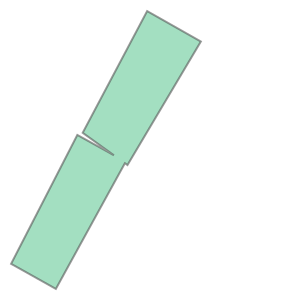

In [6]:
geom_union = geom1.union(geom2)
geom_union.as_arcpy

#### a2. Difference

In [11]:
geom3_json = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100}, 'rings': [[[-8233020.380435019, 4978303.121194171], [-8232303.783294846, 4979640.769189159], [-8232026.699067313, 4979497.449761124], [-8232791.069350163, 4978112.028623458], [-8233020.380435019, 4978303.121194171]]]}

In [12]:
geom3 = Geometry(geom3_json)

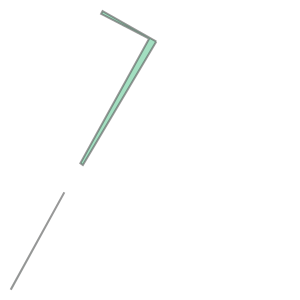

In [13]:
geom_diff = geom_union.difference(geom3)
geom_diff.as_arcpy

#### a3. Symmetric difference

The method `symmetric_difference(second_geometry)` constructs the geometry that is the union of two geometries minus the instersection of those geometries.

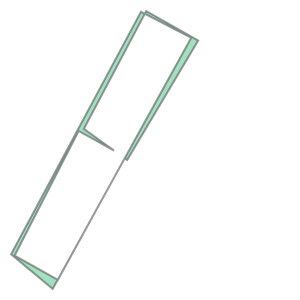

In [14]:
geom_sdiff = geom_union.symmetric_difference(geom3)
geom_sdiff.as_arcpy

#### a4. intersect() and overlaps()

The `intersect()` constructs a geometry that is the geometric intersection of the two input geometries. Different dimension values can be used to create different shape types. The intersection of two geometries of the same shape type is a geometry containing only the regions of overlap between the original geometries. And its arguments include,
  - second_geometry: required arcgis.geometry.Geometry. 
  - A second geometry dimension: required Integer. The topological dimension (shape type) of the resulting geometry, which can be:
    - 1: A zero-dimensional geometry (point or multipoint).
    - 2: A one-dimensional geometry (polyline).
    - 4: A two-dimensional geometry (polygon).

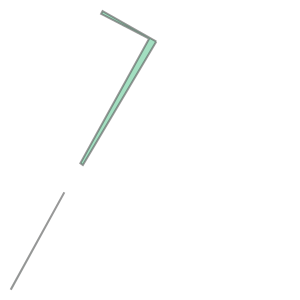

In [20]:
geom_intersection = geom_sdiff.intersect(second_geometry = geom_diff,
                                         dimension=4)
geom_intersection.as_arcpy

And the `overlaps()` will return a boolean value which indicates if the intersection of the two geometries has the same shape type as one of the input geometries and is not equivalent to either of the input geometries.

According to the definition, we can tell that `overlaps()` contains two operations - first, it creates the interection of first and second geometries; second, it checks if the intersection is None, or it being equivalent to either the first or the second geometry - if True, then overlaps() returns `False`, or else, returns `True`.

In [38]:
# False, because the intersection of geom1 and geom_union is geom1, and that is equivalent to the first geometry
geom1.overlaps(geom_union)

False

In [45]:
# True, because the intersection of geom1 and geom_intersection is partial shape of geom_intersection, and is not
# equivalent to either one
geom1.overlaps(geom_intersection)

True

#### a5. Equals

Indicates if the base and comparison geometries are of the same shape type and define the same set of points in the plane. This is a 2D comparison only; M and Z values are ignored.

In [21]:
geom_intersection.equals(geom_diff)

True

In [22]:
geom_intersection.equals(geom_sdiff)

False

#### a6. generalize V.S. buffer

Next, you will see the difference between these two spatial operations:
  - `generalize(max_offset)` - Creates a new simplified geometry using a specified maximum offset tolerance.
  - `buffer(distance)` - Constructs a polygon at a specified distance from the geometry.
  
The buffering process merges buffer polygons that overlap. Negative distances greater than one-half the maximum interior width of a polygon result in an empty geometry.
<img src="http://webhelp.esri.com/arcgisdesktop/9.2/published_images/ST_Buffer.gif" />
<h5><center>Buffer operation (Source: <a href="http://webhelp.esri.com/arcgisdesktop/9.2/index.cfm?TopicName=Spatial_operations">ArcGIS Desktop Help</a>)</center></h5>

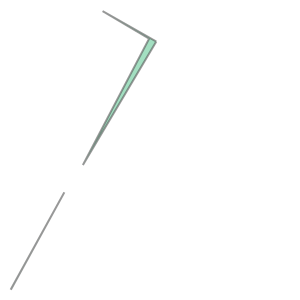

In [28]:
geom_generalized = geom_diff.generalize(max_offset=50)
geom_generalized.as_arcpy

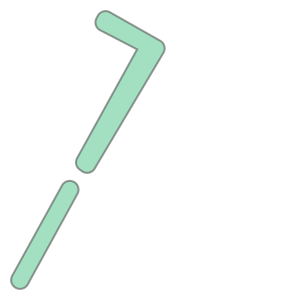

In [27]:
geom_buffered = geom_diff.buffer(distance=50)
geom_buffered.as_arcpy

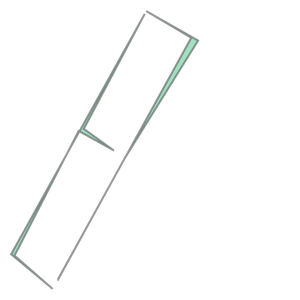

In [35]:
geom_generalized2 = geom_sdiff.generalize(max_offset=100)
geom_generalized2.as_arcpy

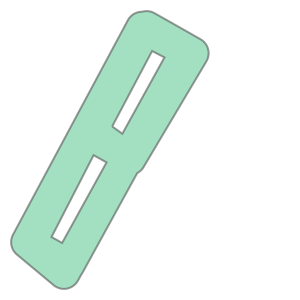

In [36]:
geom_buffered2 = geom_sdiff.buffer(distance=100)
geom_buffered2.as_arcpy

#### a7. distance

`query_point_and_distance(second_geometry, use_percentage=False)` - finds the point on the polyline nearest to the in_point and the distance between those points. Also returns information about the side of the line the in_point is on as well as the distance along the line where the nearest point occurs.

In [78]:
access_point = Point({'spatialReference': {'latestWkid': 3857, 'wkid': 102100}, 'x': -8234818.501757936, 'y': 4978337.398475052})

In [79]:
access_polyline = Polyline({'spatialReference': {'latestWkid': 3857, 'wkid': 102100}, 
                            'paths': [[[-8234920.019686119, 4978251.645698531], [-8234885.38415768, 4978242.091069995], 
                                       [-8234849.554300674, 4978245.674055696], [-8234808.947129401, 4978255.228684231],
                                       [-8234773.117272396, 4978251.645698531], [-8234751.619358192, 4978239.702412861],
                                       [-8234736.093086823, 4978215.815841525]]]})


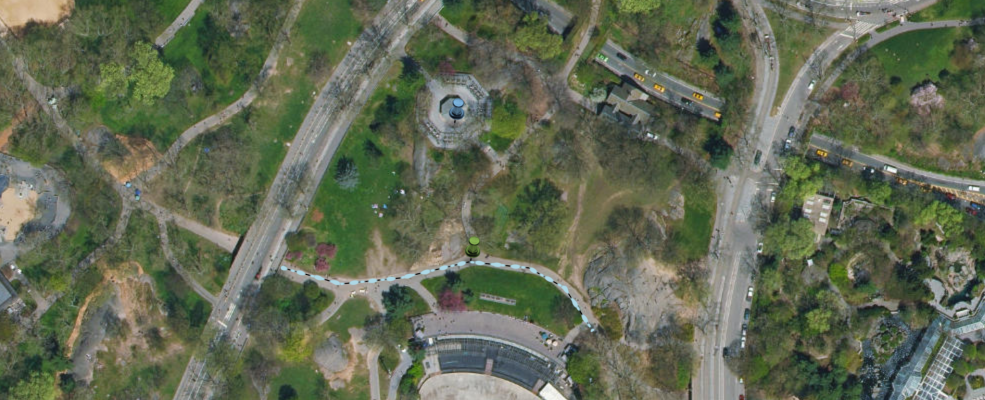

In [92]:
map1 = gis.map()
map1.basemap = "satellite"
map1

In [81]:
map1.height= "650px"

location = geocode("Central Park, New York")[0]
map1.extent = location['extent']

In [91]:
map1.draw(access_polyline,
          symbol = {
                      "type": "simple-line",
                      "color": "lightblue",
                      "width": "4px",
                      "style": "short-dot"
                    })

In [83]:
map1.draw(access_point, 
          symbol = {"angle":0,"xoffset":2,"yoffset":8,"type":"esriPMS",
                    "url":"http://static.arcgis.com/images/Symbols/Basic/BlueShinyPin.png",
                    "contentType":"image/png","width":24,"height":24})

In [84]:
access_res = access_polyline.query_point_and_distance(access_point)
access_res

(<PointGeometry object at 0xbb8f107128[0xbb8f106350]>,
 113.65391060742849,
 82.72342745570265,
 False)

In [85]:
access_res[0].type

'point'

In [86]:
access_res[0].JSON

'{"x":-8234808.9471294014,"y":4978255.2286842307,"spatialReference":{"wkid":102100,"latestWkid":3857}}'

In [87]:
a_p = Point({"x":-8234808.9471294014,"y":4978255.2286842307,"spatialReference":{"wkid":102100,"latestWkid":3857}})

In [88]:
map1.draw(a_p, 
          symbol = {"angle":0,"xoffset":2,"yoffset":8,"type":"esriPMS",
                    "url":"http://static.arcgis.com/images/Symbols/Basic/GreenShinyPin.png",
                    "contentType":"image/png","width":24,"height":24})

#### a8. contains

`contains(second_geometry, relation=None)` - indicates if the base geometry contains the comparison geometry.

In [94]:
access_polyline.contains(a_p)

True

In which an optional paramter `relation` can be used to specify the spatial relationship type.
  - `BOUNDARY` - Relationship has no restrictions for interiors or boundaries.
  - `CLEMENTINI` - Interiors of geometries must intersect. Specifying CLEMENTINI is equivalent to specifying None. This is the default.
  - `PROPER` - Boundaries of geometries must not intersect.

In [95]:
access_polyline.contains(a_p, relation = "BOUNDARY")

True

In [96]:
access_polyline.contains(a_p, relation = "PROPER")

True

In [106]:
access_polygon = Polygon({'spatialReference': {'latestWkid': 3857, 'wkid': 102100}, 
                          'rings': [[[-8234920.019686119, 4978251.645698531], [-8234885.38415768, 4978242.091069995], 
                                     [-8234849.554300674, 4978245.674055696], [-8234808.947129401, 4978255.228684231],
                                     [-8234773.117272396, 4978251.645698531], [-8234751.619358192, 4978239.702412861],
                                     [-8234736.093086823, 4978215.815841525], [-8234663.657066563, 4978349.222320599], 
                                     [-8234737.705437716, 4978225.012149632], [-8234935.963979837, 4978263.2306637755]]]})

In [107]:
access_polygon.contains(access_polyline)

True

In [108]:
access_polygon.contains(access_polyline, relation = "BOUNDARY")

True

In [109]:
access_polygon.contains(access_polyline, relation = "PROPER")

True

#### a9. clip

The method `clip(envelope)` constructs the intersection of the geometry and the specified extent. Note that, if `ArcPy` is not installed, none is returned. The one and required input parameter is,
  - `envelope`: required tuple. The tuple must have (XMin, YMin, XMax, YMax) each value represents the lower left bound and upper right bound of the extent.

In [126]:
# (XMin, YMin, XMax, YMax) 
x = access_polygon.centroid[0]
y = access_polygon.centroid[1]
envelope_tuple = (x-10, y-10, x+10, y+10)

In [127]:
clipped = access_polygon.clip(envelope_tuple)
clipped.JSON

'{"rings":[[[-8234806.8545798864,4978238.3421204891],[-8234812.0829710849,4978239.3500032499],[-8234812.0829710849,4978254.4908484565],[-8234808.9471000005,4978255.2286999971],[-8234792.0829710849,4978253.5422776937],[-8234792.0829710849,4978238.3421204891],[-8234806.8545798864,4978238.3421204891]]],"spatialReference":{"wkid":102100,"latestWkid":3857}}'

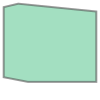

In [128]:
clipped.as_arcpy

### b. Calling functions from `arcgis.geometry.functions`

Besides calling methods off the geometry object as discussed in section (a), users can also call spatial operations directly from `arcgis.geometry.functions.

#### b1. Union

Compared to what is used in section (a1) in performing union operation (a.k.a. `geom_union = geom1.union(geom2)`), calling the union() method directly on a geometry resource service would require these input parameters:
  - `spatial_ref` - The well-known ID of the spatial reference or a spatial reference json object.
  - `geometries` - The array of geometries to be unioned.
  - `gis` - The active GIS instance.

In [129]:
from arcgis.geometry import union

C:\ArcGIS\Resources\ArcPy\arcpy\geoprocessing\_base.py:482: RuntimeWarning: No spatial reference detected, defaulting to unknown coordinate system.
  return self._gp.FromEsriJson(json)


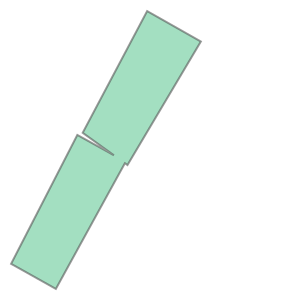

In [132]:
geom_union_b = union(spatial_ref=3857,
                     geometries = [geom1, geom2],
                     gis = gis)
geom_union_b.as_arcpy

#### b2. intersect() and overlaps()

The intersect function `arcgis.geometry.intersect(spatial_ref, geometries, geometry, gis=None)` is performed on a geometry service resource. This function constructs the set-theoretic intersection between an array of geometries and another geometry. The dimension of each resultant geometry is the minimum dimension of the input geometry in the geometries array and the other geometry specified by the geometry parameter. Inputs include:
  - `spatial_ref` - The well-known ID or a spatial reference JSON object for the input geometries.
  - `geometries` - An array of points, multipoints, polylines, or polygons. The structure of each geometry in the array is the same as the structure of the JSON geometry objects returned by the ArcGIS REST API.
  - `geometry` - A single geometry of any type with a dimension equal to or greater than the elements of geometries.

Let's see how it compares to what we used in section (a4) - `geom_intersection = geom_sdiff.intersect(second_geometry = geom_diff, dimension=4)`:

In [140]:
from arcgis.geometry import intersect
geom_intersection_b = intersect(spatial_ref=3857, 
                                geometries=[geom_sdiff], 
                                geometry=geom_diff, 
                                gis=gis)
geom_intersection_b

[{'rings': [[[-8231988.480599999, 4979482.162299998],
    [-8232380.2203, 4978822.8928999975],
    [-8232393.5666000005, 4978832.502300002],
    [-8232026.699100001, 4979497.4498],
    [-8232282.8696, 4979629.951800004],
    [-8232275.1194, 4979644.590999998],
    [-8231988.480599999, 4979482.162299998]],
   [[-8232479.2171, 4978677.260799997],
    [-8232762.4055, 4978161.712800004],
    [-8232763.3619, 4978162.248400003],
    [-8232479.2171, 4978677.260799997]]]}]

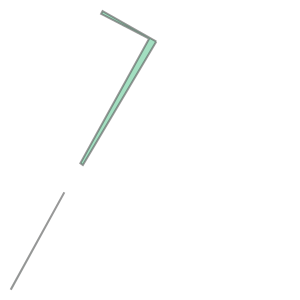

In [141]:
geom_intersection_b[0].as_arcpy

Unlike what's stated in section (a4) that a simple `first_geometry.overlaps(second_geometry)` can just perform an overalapping operation which then returns a boolean value which indicates if the intersection of the two geometries has the same shape type as one of the input geometries and is not equivalent to either of the input geometries, there is no direct match of `overlaps` function in the `arcgis.geometry.functions`.

However, we can write our own function as in `my_overlap` in situations when OOP pattern is not applicable, and it includes two operations - first, it creates the interection of first and second geometries; second, it checks if the intersection is None, or it being equivalent to either the first or the second geometry - if True, then overlaps() returns `False`, or else, returns `True`.

In [145]:
def my_overlap(spatial_ref, geometry1, geometry2, gis):
    intersection = intersect(spatial_ref, 
                             geometries=[geometry1], 
                             geometry=geometry2, 
                             gis=gis)
    if intersection is None:
        return False
    elif intersection[0].equals(geometry1) or intersection[0].equals(geometry2):
        return False
    else:
        return True

In [146]:
# False, because the intersection of geom1 and geom_union is geom1, and that is equivalent to the first geometry
my_overlap(3857, geom1, geom_union, gis)

False

In [147]:
# True, because the intersection of geom1 and geom_intersection is partial shape of geom_intersection, and is not
# equivalent to either one
my_overlap(3857, geom1, geom_intersection, gis)

True

#### b3. Difference

In order to construct the set-theoretic difference between each element of an array of geometries and another geometry (a.k.a. the so-called difference geometry), users need to perform a `difference` function on a geomtry service resource, which requires these inputs:
 - `geometries` - An array of points, multipoints, polylines or polygons. The structure of each geometry in the array is the same as the structure of the JSON geometry objects returned by the ArcGIS REST API.
 - `spatial_ref` - The well-known ID of the spatial reference or a spatial reference JSON object for the input geometries.
  - `geometry` - A single geometry of any type and of a dimension equal to or greater than the elements of geometries. The structure of geometry is the same as the structure of the JSON geometry objects returned by the ArcGIS REST API. The use of simple syntax is not supported.
    
In other words, when performing `arcgis.geometry.difference(geometries=[A1, A2, ..., An], spatial_ref, geometry=B, gis=None)`, let B be the difference geometry. For each geometry in [A1, A2, ..., An], in the input geometry array, it constructs `An-B`.

In [134]:
from arcgis.geometry import difference
geom_diff_b = difference(geometries=[geom1, geom2, geom_union], 
                         spatial_ref=3857, 
                         geometry=geom3, 
                         gis=gis)
geom_diff_b

[{'rings': [[[-8232479.221100001, 4978677.253700003],
    [-8232762.4055, 4978161.712800004],
    [-8232763.3619, 4978162.248400003],
    [-8232479.221100001, 4978677.253700003]]]},
 {'rings': [[[-8231988.480599999, 4979482.162299998],
    [-8232380.2203, 4978822.8928999975],
    [-8232393.5667, 4978832.502300002],
    [-8232026.699100001, 4979497.4498],
    [-8232282.8696, 4979629.951800004],
    [-8232275.1194, 4979644.590999998],
    [-8231988.480599999, 4979482.162299998]]]},
 {'rings': [[[-8231988.480599999, 4979482.162299998],
    [-8232380.2203, 4978822.8928999975],
    [-8232393.5666000005, 4978832.502300002],
    [-8232026.699100001, 4979497.4498],
    [-8232282.8696, 4979629.951800004],
    [-8232275.1194, 4979644.590999998],
    [-8231988.480599999, 4979482.162299998]],
   [[-8232479.2171, 4978677.260799997],
    [-8232762.4055, 4978161.712800004],
    [-8232763.3619, 4978162.248400003],
    [-8232479.2171, 4978677.260799997]]]}]

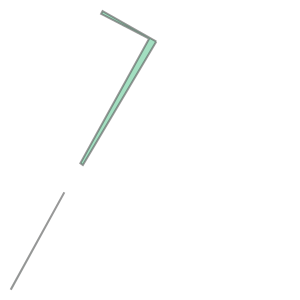

In [135]:
geom_diff_b[2].as_arcpy

In [138]:
""" Compared to geom_diff derived from `geom_diff = geom_union.difference(geom3)`
"""
geom_diff_b[2].equals(geom_diff)

True

#### b4. Symmetric difference

Again there is no direct match of `symmetric_difference` function in the `arcgis.geometry.functions`. In situations when OOP pattern of this call is not applicable, you can construct your own customized function that create the geometry which is the union of two geometries minus the instersection of those geometries.

In [151]:
def my_symmetric_difference(spatial_ref, geometry1, geometry2, gis):
    union_b = union(spatial_ref,
                    geometries = [geometry1, geometry2],
                    gis = gis)
    intersect_b = intersect(spatial_ref, 
                            geometries=[geometry1], 
                            geometry=geometry2, 
                            gis=gis)
    symm_diff_b = difference(geometries=[union_b], 
                             spatial_ref=spatial_ref, 
                             geometry=intersect_b[0], 
                             gis=gis)
    return symm_diff_b

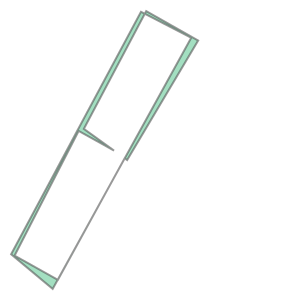

In [153]:
geom_sdiff_b = my_symmetric_difference(3857, geom_union, geom3, gis)
geom_sdiff_b[0].as_arcpy

In [154]:
geom_sdiff_b[0].equals(geom_sdiff)

True

#### b5. Equals

Still, there is no direct match of `equals()` function in the `arcgis.geometry.functions`. In situations when OOP pattern of this call is not applicable, you can construct your own customized function that checks if two geometries are equal.

In [161]:
def my_equals(spatial_ref, geometry1, geometry2, gis):
    if geometry1.type == geometry2.type:
        diff_b = difference(geometries=[geometry1], 
                            spatial_ref=spatial_ref, 
                            geometry=geometry2, 
                            gis=gis)
        if diff_b[0] is None:
            return True
        else:
            return False
        
    return False

In [162]:
my_equals(3857, geom_intersection, geom_diff, gis)

False

In [21]:
geom_intersection.equals(geom_diff)

True

In [22]:
geom_intersection.equals(geom_sdiff)

False

#### a6. generalize V.S. buffer

Next, you will see the difference between these two spatial operations:
  - `generalize(max_offset)` - Creates a new simplified geometry using a specified maximum offset tolerance.
  - `buffer(distance)` - Constructs a polygon at a specified distance from the geometry.
  
The buffering process merges buffer polygons that overlap. Negative distances greater than one-half the maximum interior width of a polygon result in an empty geometry.
<img src="http://webhelp.esri.com/arcgisdesktop/9.2/published_images/ST_Buffer.gif" />
<h5><center>Buffer operation (Source: <a href="http://webhelp.esri.com/arcgisdesktop/9.2/index.cfm?TopicName=Spatial_operations">ArcGIS Desktop Help</a>)</center></h5>

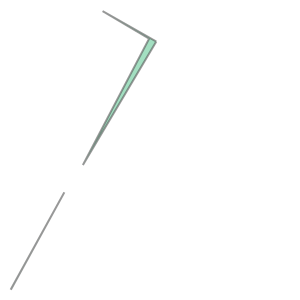

In [28]:
geom_generalized = geom_diff.generalize(max_offset=50)
geom_generalized.as_arcpy

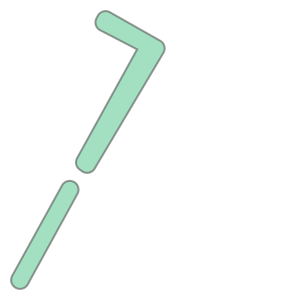

In [27]:
geom_buffered = geom_diff.buffer(distance=50)
geom_buffered.as_arcpy

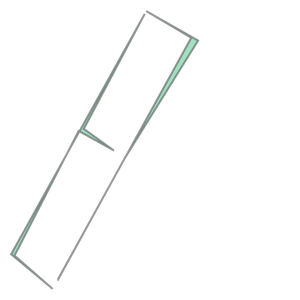

In [35]:
geom_generalized2 = geom_sdiff.generalize(max_offset=100)
geom_generalized2.as_arcpy

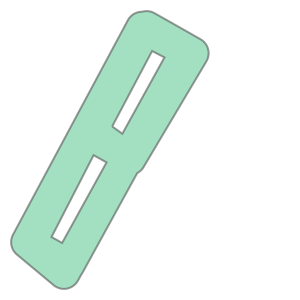

In [36]:
geom_buffered2 = geom_sdiff.buffer(distance=100)
geom_buffered2.as_arcpy

In [102]:
map2 = gis.map()
map2.basemap = "satellite"
map2

MapView(layout=Layout(height='400px', width='100%'))

Computing area of drawn polygon...
{'spatialReference': {'latestWkid': 3857, 'wkid': 102100}, 'rings': [[[-8234935.963979837, 4978263.2306637755], [-8234818.919780272, 4978451.93457736], [-8234663.657066563, 4978349.222320599], [-8234737.705437716, 4978225.012149632], [-8234935.963979837, 4978263.2306637755]]]}
Area (sr=3857): 34388.15086063064 sq m.


NameError: name 'project' is not defined

In [103]:
map2.height= "650px"

location = geocode("Central Park, New York")[0]
map2.extent = location['extent']

In [104]:
# Define the callback function that computes the area.
def calc_area(map1, g):
    print("Computing area of drawn polygon...")
    print(g)
    """
    area = areas_and_lengths(polygons = [g],
                             length_unit = "esriSRUnit_Meter",
                             area_unit = "esriSquareMeters",
                             calculation_type = "geodesic",
                             spatial_ref = g['spatialReference'])
    print("Area-1: " + str(area) + " sq m.")
    """
    area0 = Polygon(g).area
    print("Area (sr=3857): " + str(area0) + " sq m.")
    area = project(geometries=[Polygon(g)], in_sr=g['spatialReference'], out_sr=4326)[0].area
    print("Area (sr=4326): " + str(area) + " sq m.")

# Set calc_dist as the callback function to be invoked when a polygon is drawn on the map
map2.on_draw_end(calc_area)

In [105]:
map2.draw("polygon")

In [51]:
def print_polyline(map1, g):
    print(g)
    
map2.on_draw_end(print_polyline)

In [52]:
map2.draw("polyline")

## Conclusions

End of File